In [1]:
import pandas as pd  # For data handling and manipulation
import numpy as np  # For numerical operations
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # For data preprocessing
from sklearn.ensemble import RandomForestClassifier  # For a Random Forest Classifier
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation
from sklearn.linear_model import Lasso  # For Lasso regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree regression
from sklearn.feature_selection import RFE  # For Recursive Feature Elimination (RFE)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error  # For regression evaluation
from sklearn.linear_model import LassoCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Load your dataset
data = pd.read_excel('data for Analysis.xlsx')



In [2]:
data.dropna(inplace=True)

In [3]:
# Define the bin edges and labels
bins = [16, 25, 35, 45, 55, float('inf')]  # Lower bound for '55+' is 55, no upper bound
labels = ['16-24', '25-34', '35-44', '45-54', '55+']

# Create a new 'Age_Bins' column by binning the 'Age' column
data['Age_Bins'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Drop the original 'Age' column
data = data.drop('Age', axis=1)

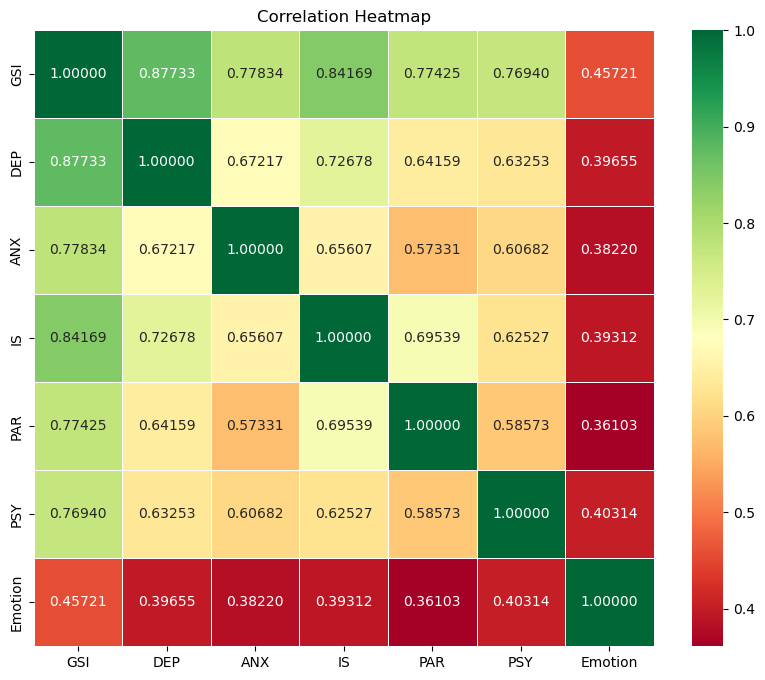

<Figure size 640x480 with 0 Axes>

In [4]:
correlation_matrix = data[['GSI', 'DEP', 'ANX', 'IS', 'PAR', 'PSY', 'Emotion']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".5f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('figure.png')

In [5]:
data = pd.get_dummies(data, columns=['Age_Bins'], prefix='Age')

In [6]:
# Convert 'Nationality' and 'JobPosition' into dummy variables
data = pd.get_dummies(data, columns=['Nationality', 'JobPosition'], drop_first=True)

In [9]:
from sklearn.model_selection import cross_val_predict
# Suppress specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming 'data' is your DataFrame with the features and target variable
X = data.drop('Emotion', axis=1)  # Exclude the 'Emotion' column
y = data['Emotion']

# Create a LassoCV model with cross-validation
lasso_model = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)  # You can adjust alpha and cv as needed

# Fit the model to the entire dataset using cross-validation
y_pred = cross_val_predict(lasso_model, X, y, cv=5)

# Fit the model on the entire dataset
lasso_model.fit(X, y)

# Get the coefficients of all features
coef_values = lasso_model.coef_
# Get the y-intercept of the Lasso model
y_intercept = lasso_model.intercept_

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coef_values})
# Sort the table by absolute coefficient values in descending order
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Calculate R-squared (R2) to assess model performance
r2 = r2_score(y, y_pred)

# Calculate adjusted R-squared (adj R2)
n = len(y)  # Number of samples
p = X.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)


# Display R2, adjusted R2, and MSE separately
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adj R2):", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Y-intercept:", y_intercept)
print("---------------------")
# Display the coefficients as a table
print("Coefficients:")
print(coef_df[coef_df['Coefficient']!=0])

coef_df[coef_df['Coefficient']!=0].to_excel('raw.xlsx', index=False)


R-squared (R2): 0.24484835418668793
Adjusted R-squared (Adj R2): 0.22778831960196755
Mean Squared Error (MSE): 41.7673283867551
Y-intercept: 24.894419221192337
---------------------
Coefficients:
                                  Feature  Coefficient
33                   Nationality_Malaysia     4.333912
28                  Nationality_Indonesia     4.242144
42         Nationality_Russian Federation    -3.792556
30                     Nationality_Latvia    -2.895594
45                    Nationality_Ukraine    -1.726742
24                    Nationality_Georgia    -1.342989
38                Nationality_Philippines     1.234823
53              JobPosition_Chief Officer     1.206079
68      JobPosition_Junior Engine Officer    -1.163572
71                     JobPosition_Master     1.141375
80             JobPosition_Second Officer     0.903640
52             JobPosition_Chief Engineer     0.887265
79            JobPosition_Second Engineer     0.825367
32                  Nationality_Li

**Min Max Conversion**

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming 'data' is your DataFrame with the features and target variable
X = data.drop('Emotion', axis=1)  # Exclude the 'Emotion' column
y = data['Emotion']

# Get the maximum and minimum values of the target variable 'Emotion'
max_emotion = max(y)
min_emotion = min(y)

# Calculate the coefficient using the formula
c = max_emotion - min_emotion

# Create Min-Max Scalers for X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale the entire feature matrix X and target variable y
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Create a LassoCV model with cross-validation
lasso_model = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)  # You can adjust alpha and cv as needed

# Fit the model to the entire dataset using cross-validation
y_pred = cross_val_predict(lasso_model, X_scaled, y_scaled.ravel(), cv=5)

# ... (previous code)

# Fit the model on the entire dataset
lasso_model.fit(X_scaled, y_scaled.ravel())

# Get the coefficients of all features
coef_values = lasso_model.coef_

# Get the y-intercept of the Lasso model
y_intercept = lasso_model.intercept_

# Create a DataFrame to display the coefficients and corresponding features
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coef_values * c})

# Sort the table by absolute coefficient values in descending order
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Calculate R-squared (R2) to assess model performance
r2 = r2_score(y_scaled, y_pred)

# Calculate adjusted R-squared (adj R2)
n = len(y_scaled)  # Number of samples
p = X.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_scaled, y_pred)

# Display features and their coefficients
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adj R2):", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Y-intercept:", y_intercept)
print('----------------------------------------------')


# Display the DataFrame with y-intercept points
print(coef_df[coef_df['Coefficient'] != 0])

# Save the coefficients DataFrame to an Excel file
coef_df[coef_df['Coefficient'] != 0].to_excel('scaled.xlsx', index=False)


R-squared (R2): 0.24622331663936536
Adjusted R-squared (Adj R2): 0.22919434456655952
Mean Squared Error (MSE): 0.018095173355999503
Y-intercept: 0.27913185801017615
----------------------------------------------
                                  Feature  Coefficient
0                                     GSI     4.898786
33                   Nationality_Malaysia     4.515799
28                  Nationality_Indonesia     4.327522
42         Nationality_Russian Federation    -3.794833
1                                     DEP     3.361692
5                                     PSY     3.266252
30                     Nationality_Latvia    -2.906979
2                                     ANX     2.615252
3                                      IS     2.123819
45                    Nationality_Ukraine    -1.744927
24                    Nationality_Georgia    -1.375311
38                Nationality_Philippines     1.235326
53              JobPosition_Chief Officer     1.216873
68      JobPositio